In [1]:
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from scipy.io import loadmat
from __future__ import division
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pickle
import seaborn as sns
%matplotlib inline

In [4]:
from spikeHelper.visuals import compareSimilarities
from sklearn.covariance import EmpiricalCovariance
from scipy.spatial.distance import mahalanobis,euclidean
from spikeHelper.dataOrganization import trialToXyT, getX,normRows

## Plot similarities

In [8]:
rat = 8
data = pickle.load(open('Data/50ms_r8_1300msPlus1s.pickle','rb'))
print('Number of neurons',data.shape[0])
print('Number of times',data.shape[1])
print('Number of trials',data.shape[2])

Number of neurons 37
Number of times 20
Number of trials 620


In [ ]:
compareSimilarities(data,'Similaridade temporal rato 8',nTrials=400)

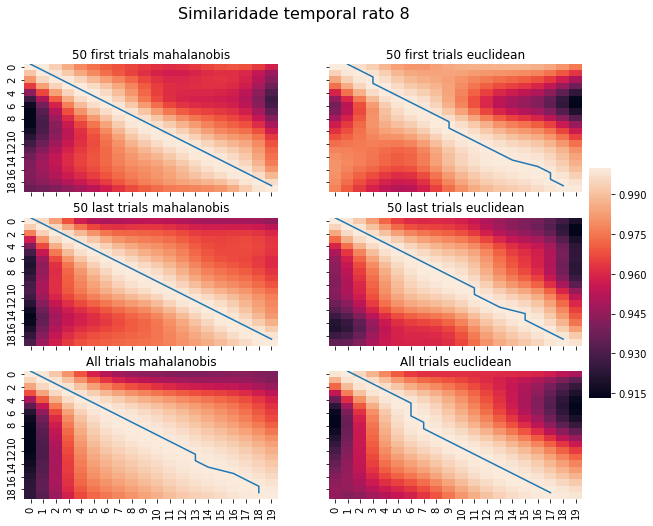

In [11]:
compareSimilarities(data,'Similaridade temporal rato 8',nTrials=50)

In [ ]:
def temporalGeneralization(X, y):
    times = np.unique(y)
    temporalGeneralizationMatrix = np.zeros([len(times),len(times)])
    for timei in times:
        clf = OneClassSVM()
        clf.fit(X[y==timei])
        dist = clf.decision_function(X)
        temporalGeneralizationMatrix[timei, :] = np.array([np.median(dist[y==t]) for t in times])
        
    M = temporalGeneralizationMatrix
    M = M - M.min(axis=1).reshape(-1,1)
    M = M/M.max(axis=1).reshape(-1,1)
    return M

In [ ]:
dataset = trialToXyT(normR10[:,:20,:])
X = dataset['X']; y = dataset['y']
M = temporalGeneralization(X,y)
sns.heatmap(M)

In [ ]:
tempo = 16
dataset = trialToXyT(normR10[:,:20,:])
X = dataset['X']; y = dataset['y']; t = dataset['trial'];
M = temporalGeneralization(X[y==tempo],t[y==tempo]%60)
sns.heatmap(M)